# Name: Jainendra Tiwari
# TSF GRIP Task-1
# Data Science and Business Analytics

Task:1 Predict the percentage of an student based on the no. of study hours.

In [1]:
#Importing required libraries...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython

In [2]:
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')

url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print(s_data)
print("Data imported successfully")

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
Data imported successfully


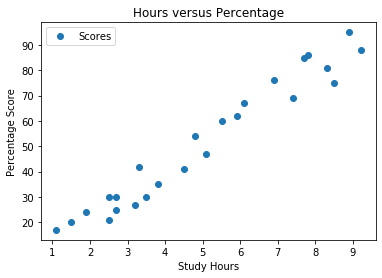

In [3]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours versus Percentage')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.show()

In [4]:
X = s_data.iloc[:, :-1].values
Y = s_data.iloc[:, 1].values

print(X)
print(Y)


[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print("Training complete.")


Training complete.


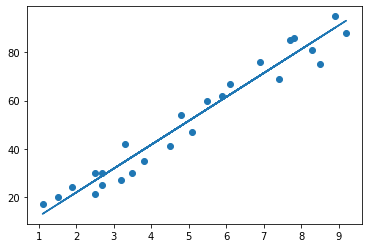

In [6]:
# Plotting the regression line
line = regressor.coef_ * X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()


In [7]:
print(X_test)                       # Testing data - (In Hours)
Y_pred = regressor.predict(X_test)  # Predicting the scores

# Comparision between Actual and Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [8]:
# Testing with own data point.
hours = 9.25
own_pred = regressor.predict([[9.25]])
print("No of Hours = {}".format([[9.25]]))
print("Predicted Score = {}".format(own_pred[0]))

from sklearn import metrics

print('Mean Absolute Error:',
      metrics.mean_absolute_error(Y_test, Y_pred))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539
Mean Absolute Error: 4.183859899002982
